# <center>Computational Physics</center>
---

## Week 2: Numerical Integration

In [65]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define the function `f`, such that $\textrm{f}(x) \equiv x^{2}\sin(x)$. This is the function that we will be integrating.

In [66]:
def f(x):
    return (x**2)*numpy.sin(x)
    '''Function equivalent to x^2 sin(x).'''
    # YOUR CODE HERE

Ensure your function works with numpy arrays:

In [67]:
xs=numpy.arange(0, 1, step=0.1)
assert numpy.isclose(f(xs), 
                     [0., 0.00099833, 0.00794677, 0.02659682, 0.06230693,
                      0.11985638, 0.20327129, 0.31566667, 0.4591079 , 0.6344948 ]).all()

Derive the indefinite integral of $f(x)$ nalytically. Call this function $g(x)$ and implement it below. Set the constant of integration such that $g(0)=0$.

In [68]:
def g(x):
    '''Analytical integral of f(x).'''
    return (2*x*numpy.sin(x)-(x**2-2)*numpy.cos(x)-2)

Check your solution with the same numpy array:

In [69]:
assert g(0) == 0.

In [70]:
assert numpy.isclose(g(xs), 
                     [0., 0.00002497, 0.00039822, 0.00200482, 0.0062869, 
                      0.01519502, 0.03112138, 0.05681646, 0.09529087, 0.1497043 ]).all()

Now, using the analytically derived indefinite integral, $g(x)$, define a function which calculates the definite integral of $f(x)$ over the interval $(x_{min},~x_{max})$.

In [71]:
def integrate_analytic(xmin, xmax):
    '''Analytical integral of f(x) from xmin to xmax.'''
    return (g(xmax)-g(xmin))

Check your analytic function:

In [72]:
assert numpy.isclose(integrate_analytic(xmin=0, xmax=4), 1.096591)

## Numerical implementation

Create a function which calculates the definite integral of the function $f(x)$ over the interval $(x_{min},~x_{max})$ using Simpson's rule with $N$ panels.

In [73]:
def integrate_numeric(xmin, xmax, N):
    ''' 
    Numerical integral of f from xmin to xmax using Simpson's rule with 
        N panels.
    '''
    dx = (xmax-xmin)/N
    m = dx/2
    
    c2 = 0
    c4 = 0
    
    for i in range(N):
        c4 = c4+4*f(xmin+(2*i+1)*m)
        
    for i in range(N-1):
        c2 = c2+2*f(xmin+(i+1)*2*m)
        
    return (dx/6)*(f(xmin)+c4+c2+f(xmax))

Make sure you have implemented Simpson's rule correctly:

In [74]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=1), 1.6266126)

In [75]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=50), 1.096591)

## Plotting task

** Task 1 **

There will always be some discrepancy between a numerically calculated result and an analytically derived result. Produce a log-log plot showing the fractional error between these two results as the number of panels is varied. The plot should have labels and a title.


Text(0,0.5,'Fractional error')

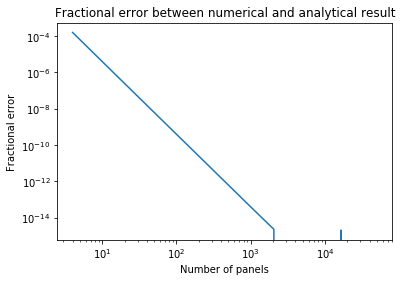

In [76]:
x0, x1 = 0, 2  # Bounds to integrate f(x) over
panel_counts = [4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 50000]  # Panel numbers to use
result_analytic = integrate_analytic(x0, x1)  # Define reference value from analytical solution

def result_numeric(x0,x1,p):
    r = []
    for i in p:
        r.append(integrate_numeric(x0,x1,i))
    return r    
    
fractional_error = 1-(result_numeric(x0,x1,panel_counts)/result_analytic)

plt.loglog(panel_counts,fractional_error)
plt.title('Fractional error between numerical and analytical result')
plt.xlabel('Number of panels')
plt.ylabel('Fractional error')

What effect(s) does changing the number of panels used have
on the accuracy of the numerical method? What happens if the number of panels is taken too large?

Increasing the number of panels reduces the error rapidly as the numerical method becomes more accurate. If the number of panels is too large the error stops decreasing and starts varying between 0 and 10^-14.

If the trapezium rule was being used, how would the panel
count affect accuracy? 

Increasing the panel count would still reduce the error but at a slower rate and the error would carry on decreasing at the same rate for much higher numbers of panels than with the simpson rule. However it would still be less accurate than using the simpson rule until a panel count of approximately 10^16 panels.